In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="hddb",
                                           user = "postgres",
                                           password = "1234",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

# 1) Find division wise total number of patient get treatment in corona time(2020-2021)

In [22]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT gt.division,count(distinct ft.pik) as total_patient " \
              "FROM hddb_star_schema.fact_table ft " \
              "JOIN hddb_star_schema.geography_dim gt on gt.geo_key=ft.geo_key " \
              "JOIN hddb_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE tm.year >= 2020 and  tm.year <= 2021 " \
              "GROUP BY CUBE(gt.division) "\



cur.execute(select_stmt)
record_1 = cur.fetchall()

successfully connected to database


In [23]:
record_1

[('BARISAL', 127),
 ('CHITTAGONG', 314),
 ('DHAKA', 1302),
 ('KHULNA', 182),
 ('RAJSHAHI', 184),
 ('RANGPUR', 171),
 ('SYLHET', 113),
 (None, 2393)]

In [24]:
df_q1 = pd.DataFrame(record_1, columns=['division','total_patient'])
df_q1 = df_q1.dropna()
df_q1['total_patient']=df_q1['total_patient'].astype('int64')  

#df_q1.dtypes
df_q1

,division,total_patient
0,BARISAL,127
1,CHITTAGONG,314
2,DHAKA,1302
3,KHULNA,182
4,RAJSHAHI,184
5,RANGPUR,171
6,SYLHET,113


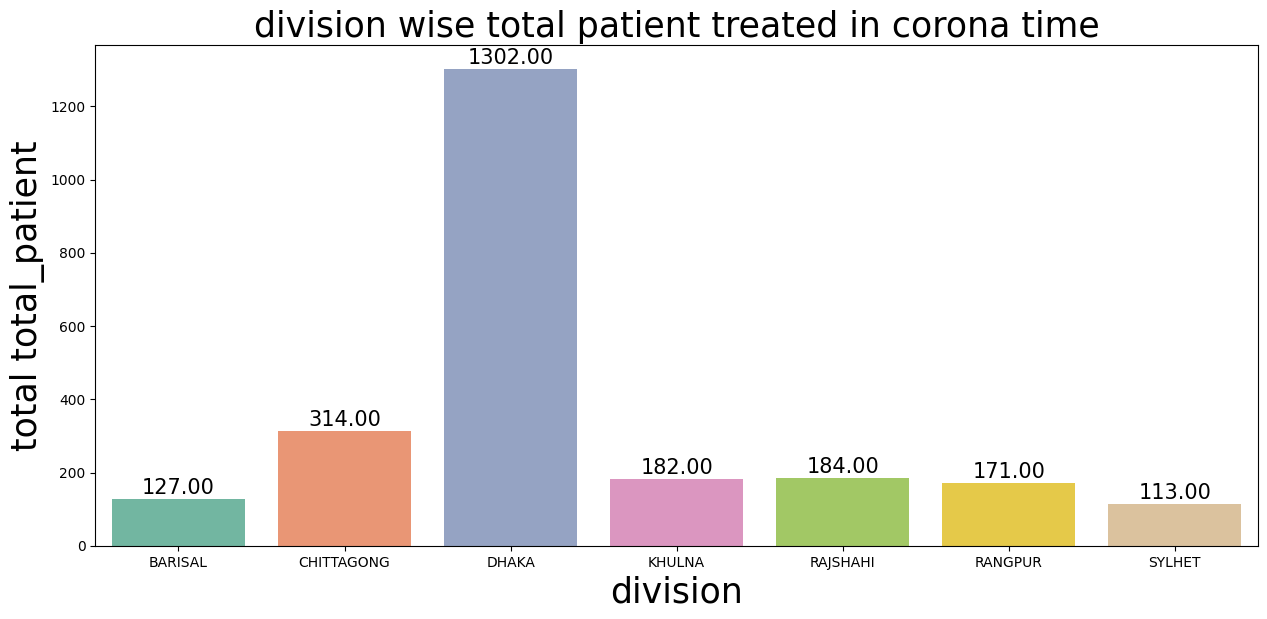

In [25]:
plt.figure(figsize=(15,6.5))
plots = sns.barplot(x=df_q1['division'],y=df_q1['total_patient'],palette="Set2")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',
                   size=15,xytext=(0, 8),
                   textcoords='offset points')
    
                   
                  
plt.xlabel('division',fontsize=25)
plt.ylabel('total_patient',fontsize=25)
plt.title('division wise total patient treated in corona time',fontsize=25)

plt.show()       

# 2)Find the number of patients tested for "tonsil single" in "winter" season

In [26]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT COUNT( distinct ft.pik) as total_patient " \
              "FROM hddb_star_schema.fact_table ft " \
              "JOIN hddb_star_schema.test_dim td on td.test_key=ft.test_key " \
              "JOIN hddb_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE  ( td.test_name = 'Tonsil Single') and (tm.month = 12 or tm.month = 1 or tm.month = 2 ) "
             



cur.execute(select_stmt)
record_2 = cur.fetchall()

successfully connected to database


In [27]:
record_2

[(0,)]

In [34]:
df_q2 = pd.DataFrame(record_2, columns=['total_patient'])
df_q2 = df_q2.dropna()
df_q2['total_patient']=df_q2['total_patient'].astype('int64')  

#df_q1.dtypes
df_q2

,total_patient
0,0


In [35]:
print('Total patients tested for "tonsil single" in winter season: 'f"{df_q2['total_patient'].values[0]}")

Total patients tested for "tonsil single" in winter season: 0


# 3)Find year wise total sales price consumed by patients for "BLOOD" test

In [30]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tm.year,COUNT(ft.sales_price) as total_sales " \
              "FROM hddb_star_schema.fact_table ft " \
              "JOIN hddb_star_schema.test_dim td on td.test_key=ft.test_key " \
              "JOIN hddb_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE  ( td.specimen = 'BLOOD')" \
              "GROUP BY CUBE(tm.year)"
             



cur.execute(select_stmt)
record_3 = cur.fetchall()

successfully connected to database


In [31]:
record_3

[(None, 67243), (2018, 5102), (2019, 49699), (2020, 12442)]

In [37]:
df_q3 = pd.DataFrame(record_3, columns=['year','total_sales'])
df_q3 = df_q3.dropna()
df_q3['total_sales']=df_q3['total_sales'].astype('float64')  

#df_q1.dtypes
df_q3

,year,total_sales
1,2018.0,5102.0
2,2019.0,49699.0
3,2020.0,12442.0


In [39]:
df_q3=df_q3.set_index(['year'])
df_q3

,total_sales
year,
2018.0,5102.0
2019.0,49699.0
2020.0,12442.0


<Axes: ylabel='total_sales'>

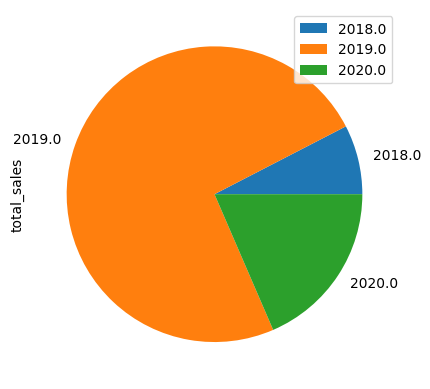

In [41]:
df_q3.plot.pie(y='total_sales')

# 4)Find quarter wise total number of patient get treatment from "Biochemistry" lab

In [59]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tm.quarter,COUNT(distinct ft.pik) as total_patient " \
              "FROM hddb_star_schema.fact_table ft " \
              "JOIN hddb_star_schema.lab_dim ld on ld.lab_key=ft.lab_key " \
              "JOIN hddb_star_schema.time_dim tm on tm.time_key=ft.time_key " \
              "WHERE ld.lab_name = 'Biochemistry' " \
              "GROUP BY CUBE (tm.quarter) "\
              "ORDER BY (tm.quarter)"
             



cur.execute(select_stmt)
record_4 = cur.fetchall()

successfully connected to database


In [60]:
record_4

[('Q1', 3152), ('Q2', 1964), ('Q3', 1990), ('Q4', 2221), (None, 6698)]

In [61]:
df_q4 = pd.DataFrame(record_4, columns=['quarter','total_patient'])
df_q4 = df_q4.dropna()
df_q4['total_patient']=df_q4['total_patient'].astype('float64')  

#df_q1.dtypes
df_q4

,quarter,total_patient
0,Q1,3152.0
1,Q2,1964.0
2,Q3,1990.0
3,Q4,2221.0


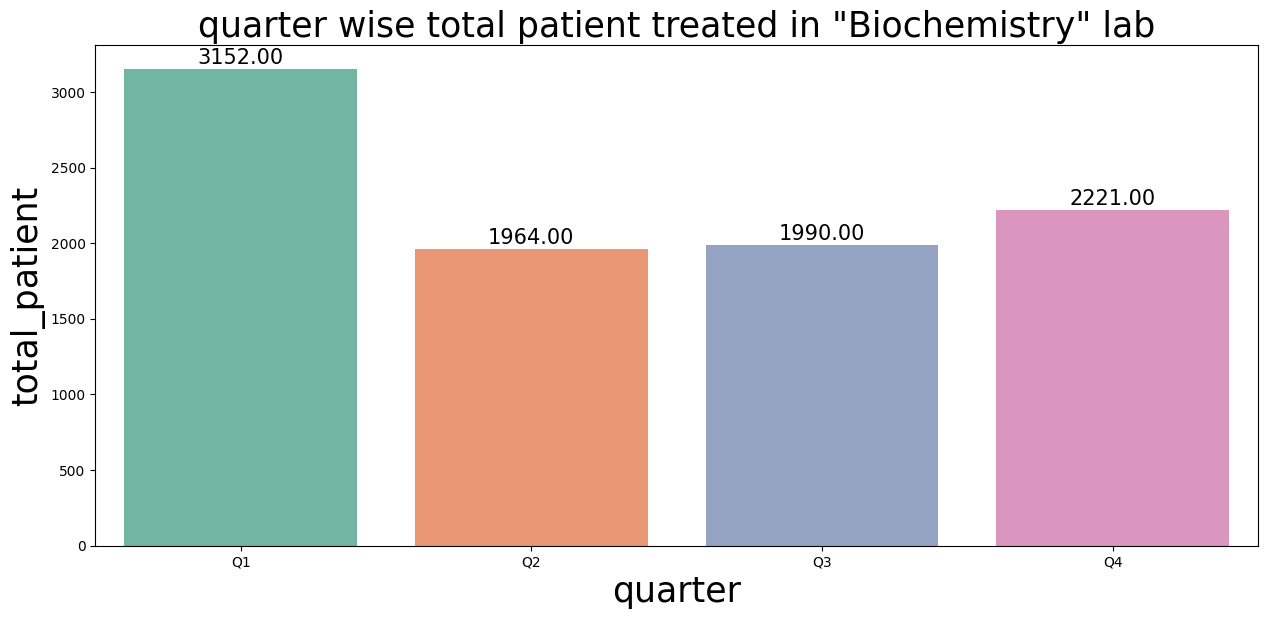

In [62]:
plt.figure(figsize=(15,6.5))
plots = sns.barplot(x=df_q4['quarter'],y=df_q4['total_patient'],palette="Set2")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width()/2,
                   bar.get_height()),ha='center',va='center',
                   size=15,xytext=(0, 8),
                   textcoords='offset points')
    
                   
                  
plt.xlabel('quarter',fontsize=25)
plt.ylabel('total_patient',fontsize=25)
plt.title('quarter wise total patient treated in "Biochemistry" lab',fontsize=25)

plt.show()     

# 5) For each test find total sales geographically(division wise)..e.g,
test1-> division1->total_sales

test2-> division2->total_sales

In [79]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT td.test_name,gd.division,SUM(ft.sales_price) as total_sales " \
              "FROM hddb_star_schema.fact_table ft " \
              "JOIN hddb_star_schema.test_dim td on td.test_key=ft.test_key " \
              "JOIN hddb_star_schema.geography_dim gd on gd.geo_key=ft.geo_key " \
              "GROUP BY (td.test_key,td.test_name,gd.division) "\
              "ORDER BY td.test_name  "


cur.execute(select_stmt)
record_5 = cur.fetchall()

successfully connected to database


In [80]:
record_5

[(' GeneXpert MTB/RIF (TISSUE)', 'DHAKA', Decimal('54500')),
 (' GeneXpert MTB/RIF (TISSUE)', 'RAJSHAHI', Decimal('5450')),
 (' GeneXpert MTB/RIF (TISSUE)', 'BARISAL', Decimal('10900')),
 (' GeneXpert MTB/RIF (TISSUE)', 'KHULNA', Decimal('5450')),
 (' Urinary Protein (Spot)', 'CHITTAGONG', Decimal('430')),
 (' Urinary Protein (Spot)', 'DHAKA', Decimal('3010')),
 (' Urinary Protein (Spot)', 'RAJSHAHI', Decimal('1290')),
 ('17 a-Hydroxyprogesterone (17a-OHP)', 'DHAKA', Decimal('18620')),
 ('17 a-Hydroxyprogesterone (17a-OHP)', 'KHULNA', Decimal('2660')),
 ('17 a-Hydroxyprogesterone (17a-OHP)', 'RAJSHAHI', Decimal('2660')),
 ('17 a-Hydroxyprogesterone (17a-OHP)', 'CHITTAGONG', Decimal('5320')),
 ('24 hrs Urinary free Cortisol', 'RAJSHAHI', Decimal('1450')),
 ('24 hrs Urine for AFB', 'DHAKA', Decimal('1920')),
 ('24 hrs Urine for AFB', 'CHITTAGONG', Decimal('480')),
 ('A/G Ratio (Albumin & Globulin) Serum', 'CHITTAGONG', Decimal('4400')),
 ('A/G Ratio (Albumin & Globulin) Serum', 'BARISAL'

In [81]:
df_q5= pd.DataFrame(record_5, columns=['test_name','division','total_sales'])
df_q5

,test_name,division,total_sales
0,GeneXpert MTB/RIF (TISSUE),DHAKA,54500
1,GeneXpert MTB/RIF (TISSUE),RAJSHAHI,5450
2,GeneXpert MTB/RIF (TISSUE),BARISAL,10900
3,GeneXpert MTB/RIF (TISSUE),KHULNA,5450
4,Urinary Protein (Spot),CHITTAGONG,430
...,...,...,...
1703,Wound Swab for Fungal C/S,KHULNA,1820
1704,Wound Swab for Gram Stain,DHAKA,3840
1705,Wound Swab for Gram Stain,CHITTAGONG,960
1706,WRCC/Unit,SYLHET,2860


In [82]:
df_q5= df_q5.dropna()
df_q5['total_sales']=df_q5['total_sales'].astype('float64')  
df_q5.dtypes

test_name       object
division        object
total_sales    float64
dtype: object

In [83]:
top5_tests = df_q5[0:19]
top5_tests

,test_name,division,total_sales
0,GeneXpert MTB/RIF (TISSUE),DHAKA,54500.0
1,GeneXpert MTB/RIF (TISSUE),RAJSHAHI,5450.0
2,GeneXpert MTB/RIF (TISSUE),BARISAL,10900.0
3,GeneXpert MTB/RIF (TISSUE),KHULNA,5450.0
4,Urinary Protein (Spot),CHITTAGONG,430.0
5,Urinary Protein (Spot),DHAKA,3010.0
6,Urinary Protein (Spot),RAJSHAHI,1290.0
7,17 a-Hydroxyprogesterone (17a-OHP),DHAKA,18620.0
8,17 a-Hydroxyprogesterone (17a-OHP),KHULNA,2660.0
9,17 a-Hydroxyprogesterone (17a-OHP),RAJSHAHI,2660.0


<Axes: title={'center': 'division wise sale(5 items)'}, xlabel='test_name', ylabel='total_sales'>

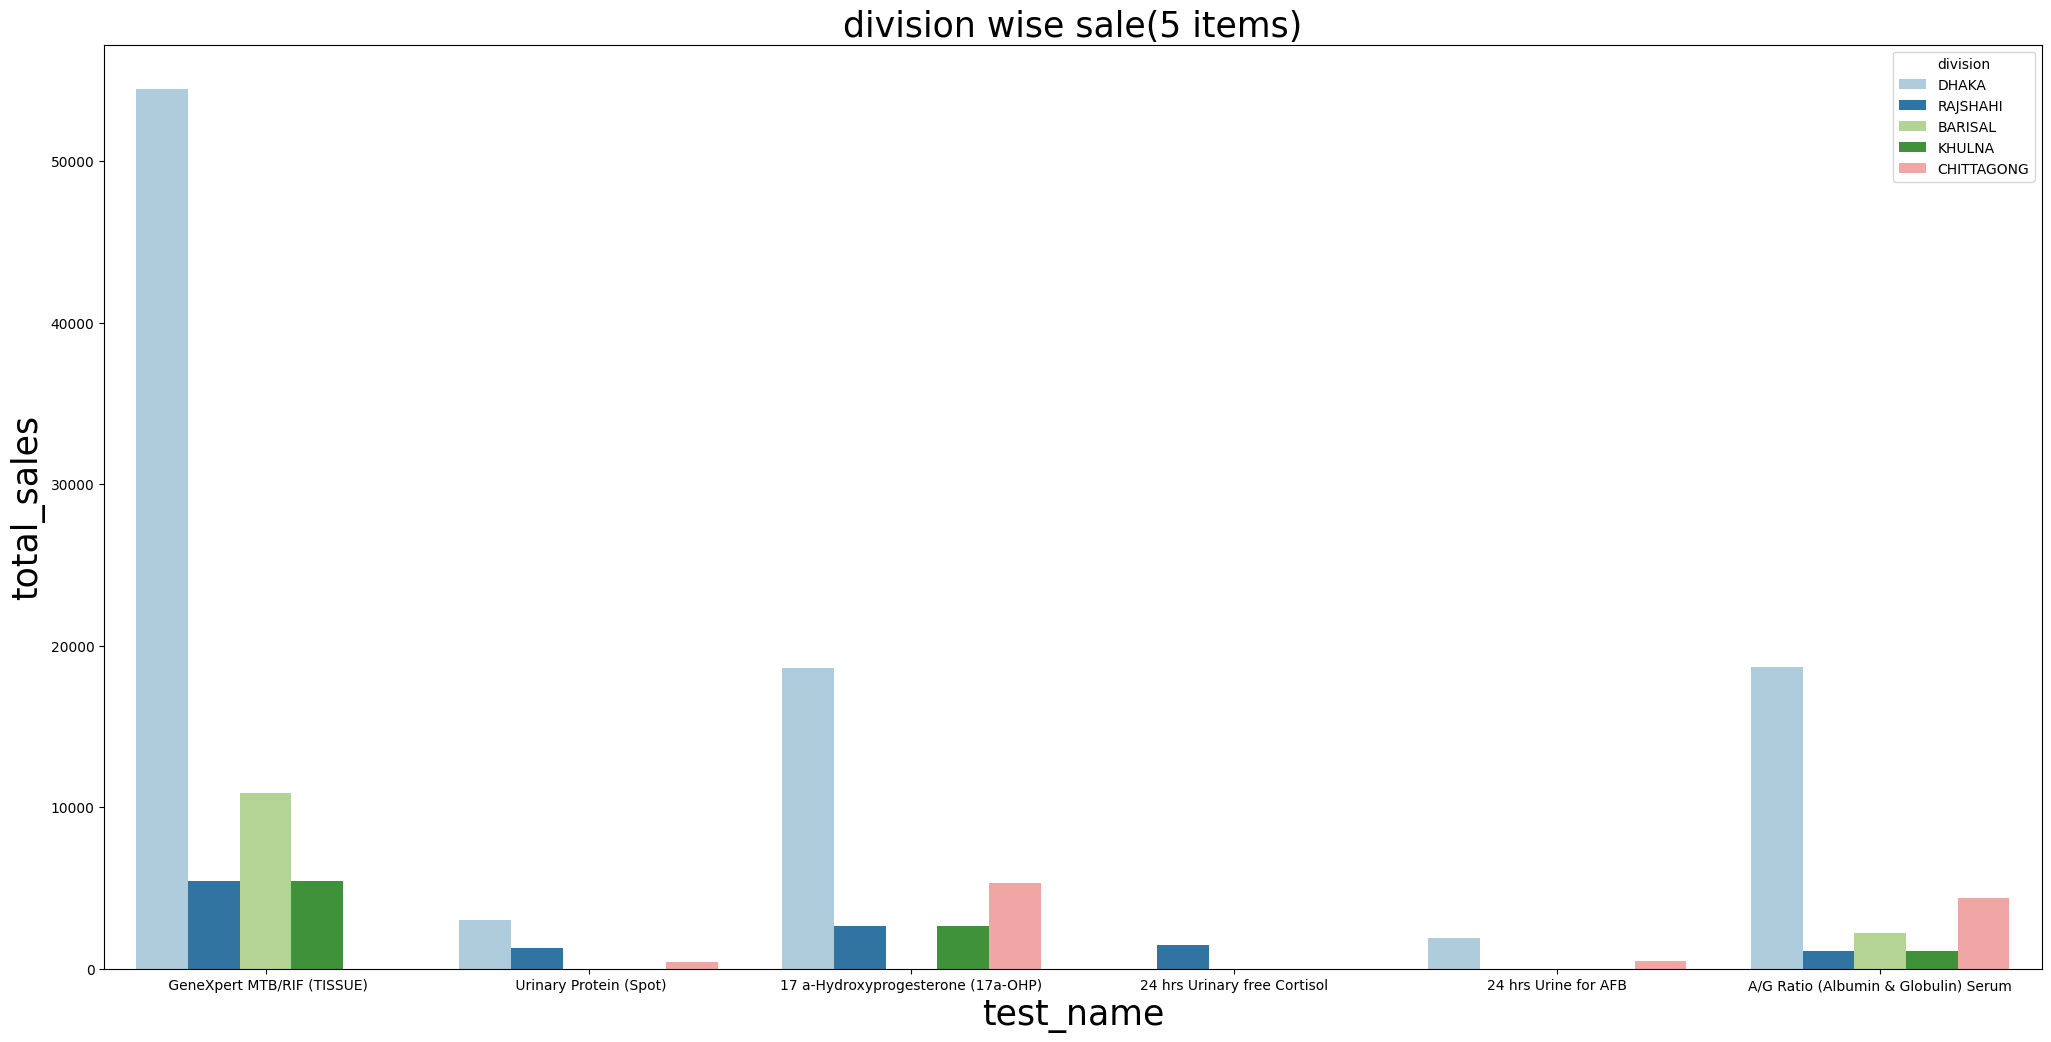

In [84]:
dims = (25,12)
fig,ax = plt.subplots(figsize=dims)
plt.xlabel('test_name',fontsize = 25)
plt.ylabel('Total sales',fontsize = 25)
plt.title('division wise sale(5 items)',fontsize = 25)
sns.barplot(x = top5_tests['test_name'],y=top5_tests['total_sales'],hue=top5_tests['division'],ax=ax,palette='Paired')